env: XLA_PYTHON_CLIENT_MEM_FRACTION=.2


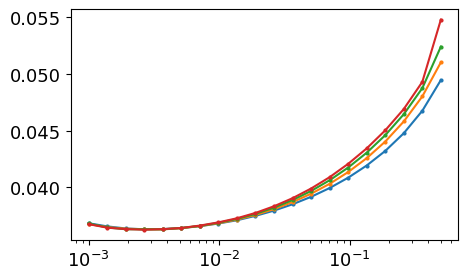

In [1]:
%env XLA_PYTHON_CLIENT_MEM_FRACTION=.2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import os
import sys
file = open("../../../../meta.txt")
home = file.read().replace("\n", "/")
file.close()
p = os.path.abspath(home+'mypylib')
if p not in sys.path:
    sys.path.append(p)
import chunGP as gp
plt.rcParams.update({'font.size': 13})

plt.rcParams['svg.fonttype'] = 'none'


#filename='sweep_m_exp_MNIST_P1585_N3170_L3_s00_seed0.npz'
#filename='sweep_m_exp_Fashion_P1585_N3170_L3_s00_seed0.npz'
#filename='sweep_m_exp_CIFAR_P1585_N3170_L3_s00_seed0.npz'
#filename='exp_Fashion_P128_N256_L3_s00_seed0.npz'
filename='exp_CIFAR_P4096_N8192_L3_s00_seed4.npz'
#filename='exp_MNIST_P128_N256_L3_s00_seed0.npz'
#filename='larger_m_exp_MNIST_P128_N256_L3_s00_seed4.npz'


st=np.load('./sweep_data/'+filename)
errAf=st['errAf']

mws=st['mws']
pas=st['pas']


fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(pas,errAf,'-o',ms=2)
ax.set_xscale('log')
#ax.set_ylim([0.0375,0.039])
#ax.plot(pas,errAf[:,0],c='r')
#ax.plot(pas,errAf[:,-1],c='b')



In [2]:
glomin=np.unravel_index(errAf.argmin(), errAf.shape)
print('f={:.4f}'.format(pas[glomin[0]]))
print('m={:.4f}'.format(mws[glomin[1]]))


f=0.0027
m=12.0000


In [3]:
np.shape(errAf)

(20, 4)

In [4]:
mws[glomin[1]]

12

f=0.1351
m=20.0000
f=0.0506
m=20.0000
f=0.0027
m=20.0000
f=0.1874
m=0.0000
f=0.0506
m=20.0000
f=0.0027
m=20.0000
f=0.1874
m=0.0000
f=0.0365
m=20.0000
f=0.0019
m=20.0000
f=0.1874
m=0.0000
f=0.0365
m=16.0000
f=0.0019
m=20.0000
f=0.1874
m=0.0000
f=0.0263
m=20.0000
f=0.0019
m=20.0000
f=0.1874
m=0.0000


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/home/cc2465/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


f=0.0263
m=16.0000


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/home/cc2465/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


f=0.0027
m=12.0000


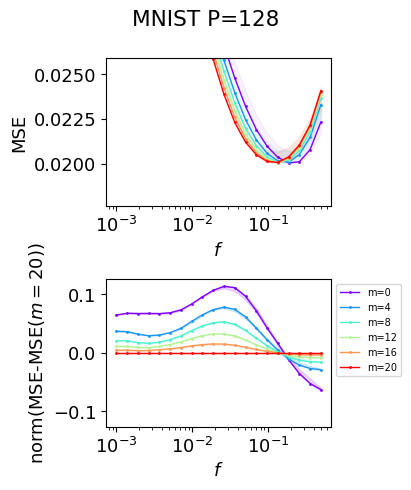

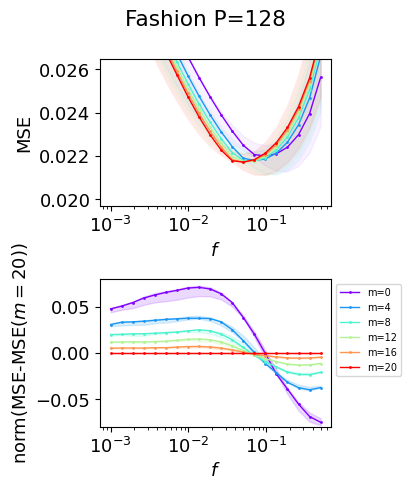

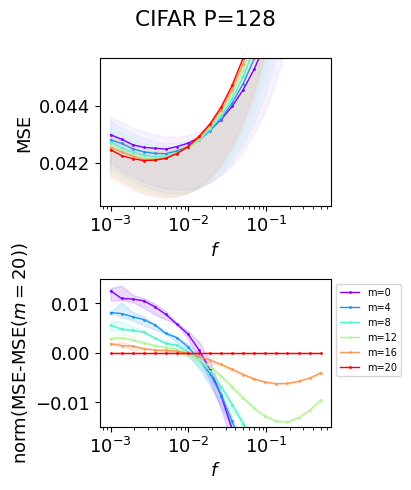

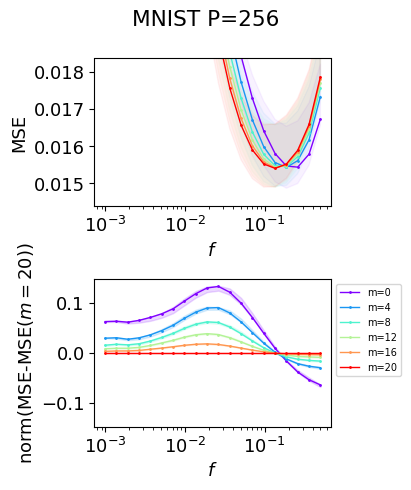

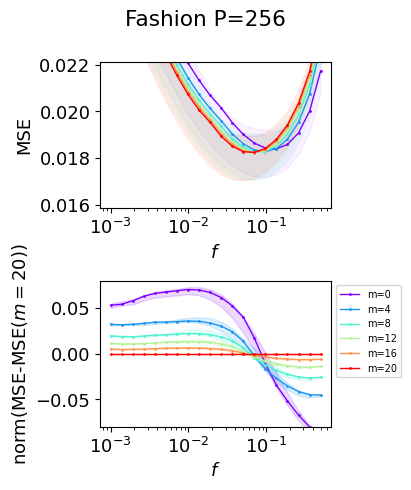

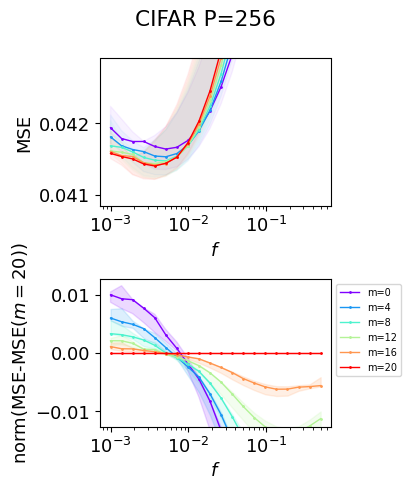

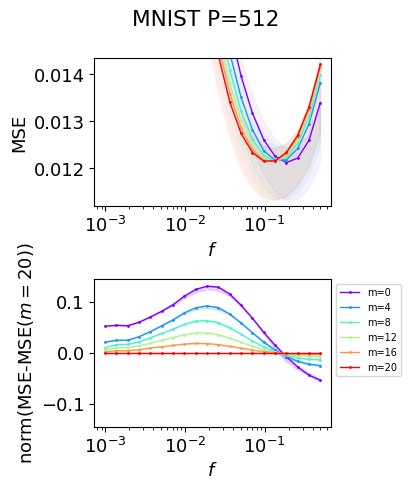

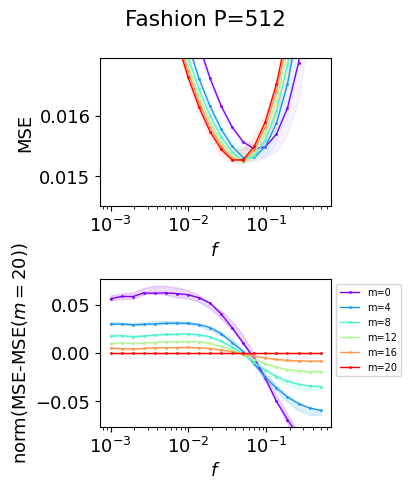

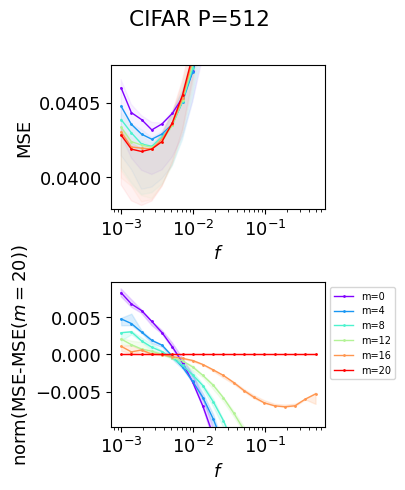

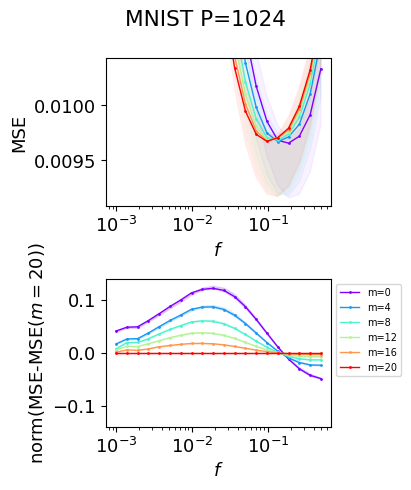

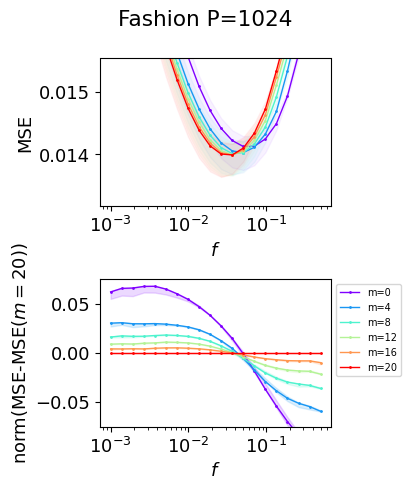

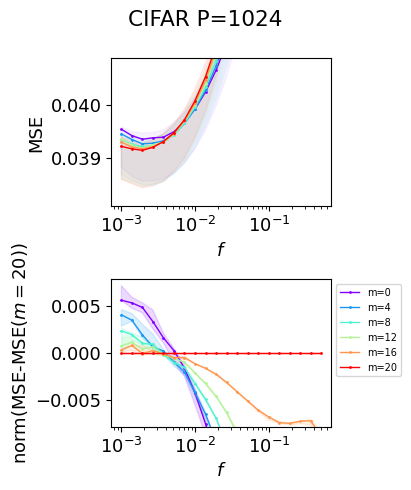

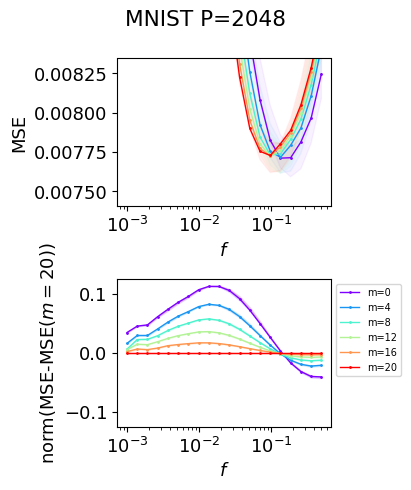

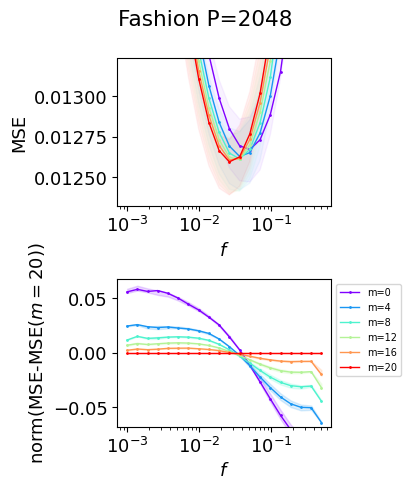

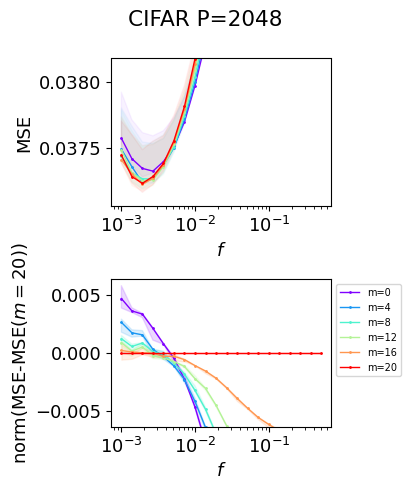

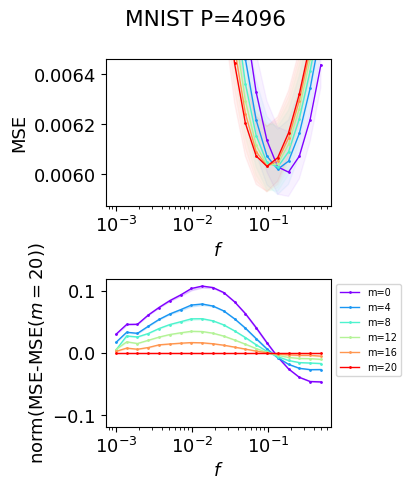

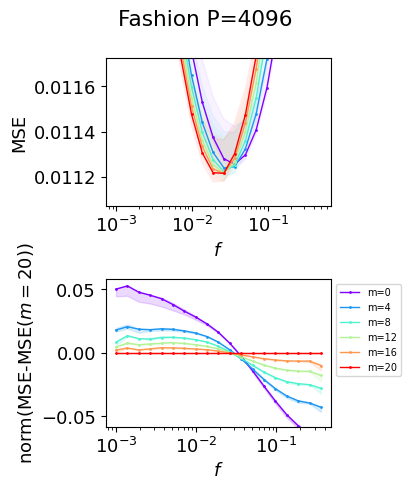

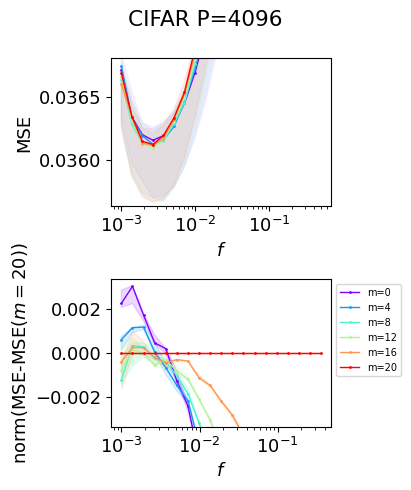

In [8]:
#from matplotlib.ticker import FormatStrFormatter
#import matplotlib.ticker as mticker


Ps=np.ceil(np.power(2,np.linspace(7,12,6))).astype(int)


filename='exp_CIFAR_P4096_N8192_L3_s00_seed4.npz'

dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(2,np.linspace(7,12,6))).astype(int)
Ns=2*Ps

numtrials=5



for i,P in enumerate(Ps):
    for dataName in dataNames:#dataNames:
        errAfs=[]
        if dataName=='CIFARG':
            continue
        for j in range(numtrials):
            filename='exp_'+dataName+'_P{}_N{}_L3_s00_seed{}.npz'.format(P,P*2,j)
            filename_larger='larger_m_'+filename
            
            st=np.load('./sweep_data/'+filename)
            stl=np.load('./sweep_data/'+filename_larger)

            errAf=st['errAf']
            errAfl=stl['errAf']
            errAf=np.block([errAf,errAfl])

            mws=st['mws']
            pas=st['pas']
            mwsl=stl['mws']
            mws=np.concatenate([mws,mwsl])
            errAfs.append(errAf)
            
        color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

        errAfs=np.array(errAfs)
        meanE=np.nanmean(errAfs,axis=0)
        stdE=np.nanstd(errAfs,axis=0)
        meanE=np.where(np.isnan(meanE),np.inf,meanE)
        
        
        q25e = np.quantile(errAfs, 0.25,axis=0)
        q50e = np.quantile(errAfs, 0.50,axis=0)
        #q50e = np.nanmean(errAfs, axis=0)
        q75e = np.quantile(errAfs, 0.75,axis=0)


        glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        print('f={:.4f}'.format(pas[glomin[0]]))
        print('m={:.4f}'.format(mws[glomin[1]]))
        ymin=meanE[glomin]-stdE[glomin]*1.2
        ymax=meanE[glomin]+stdE[glomin]*3
        
        errM=errAfs[:,:,-1]
        #subM=errAfs-errM[:,:,None]
        subM=(errAfs-errM[:,:,None])/(errM[:,:,None])

        #fig,ax=plt.subplots(1,2,figsize=(6.5,2.7))
        fig,ax=plt.subplots(2,1,figsize=(4.3,5))
        for i,mw in enumerate(mws):
            mu=q50e[:,i]
            li=q25e[:,i]
            ui=q75e[:,i]
            #ax[0].plot(pas,mu,'o-',label=r'$z_w=${}'.format(mw+1),ms='3',c=color[i])
            #ax[0].fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.05,color=color[i])
            ax[0].plot(pas,mu,'o-',label=r'$m=${}'.format(mw),ms=1,c=color[i],lw=1)
            ax[0].fill_between(st['pas'], li, ui, alpha=.05,color=color[i])
        fig.suptitle(dataName+' P={}'.format(P))
        
            #fig,ax=plt.subplots(1,1,figsize=(5,3))
            #ax.plot(pas,errAf,'-o',ms=2)
        ax[0].set_xscale('log')
        ax[0].set_ylim([ymin,ymax])
            
        q25u = np.quantile(subM, 0.25,axis=0)
        q50u = np.quantile(subM, 0.50,axis=0)
        #q50u = np.nanmean(subM, axis=0)
        q75u = np.quantile(subM, 0.75,axis=0)
        
        
        
        for i,mw in enumerate(mws):
            mu=q50u[:,i]
            li=q25u[:,i]
            ui=q75u[:,i]
            ax[1].plot(pas,(mu),'o-',c=color[i],lw=1,ms=1,label='m={}'.format(mw))
            ax[1].fill_between(st['pas'], (li), (ui), alpha=.15,color=color[i])
        
        ax[1].set_xscale('log')
        #ax[1].set_yscale('symlog')
        ax[1].set_ylim([-np.nanmax(q75u)*1.1,np.nanmax(q75u)*1.1])
        #ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
        #ax[1].ticklabel_format(axis='x',style='sci')
        
        ax[0].set_xlabel(r'$f$')
        ax[0].set_ylabel('MSE')
        ax[1].set_xlabel(r'$f$')
        ax[1].set_ylabel(r'norm(MSE-MSE($m=${}))'.format(mws[-1],mws[-1]))
        
        #glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        #print('f={:.4f}'.format(pas[glomin[0]]))
        #print('m={:.4f}'.format(mws[glomin[1]]))
        
        ax[1].legend(bbox_to_anchor=(1, 1),fontsize=7)
        plt.tight_layout()
            
        plt.savefig('plot_exp_'+dataName+'_P{}'.format(P)+'.pdf', format="pdf")


f=0.0280
m=50.0000


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/home/cc2465/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


f=0.0228
m=50.0000


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/home/cc2465/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


f=0.0228
m=50.0000


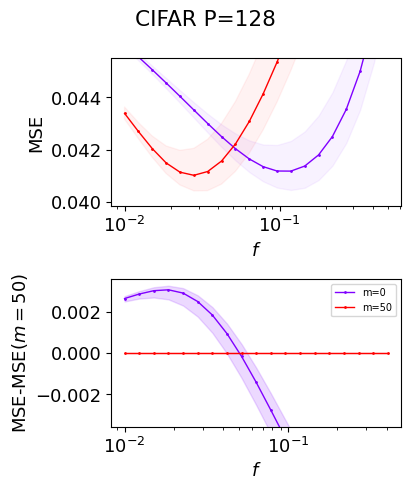

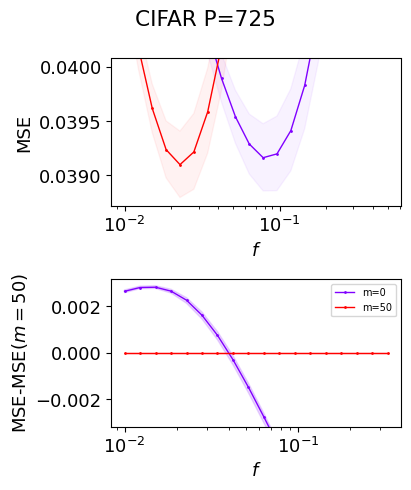

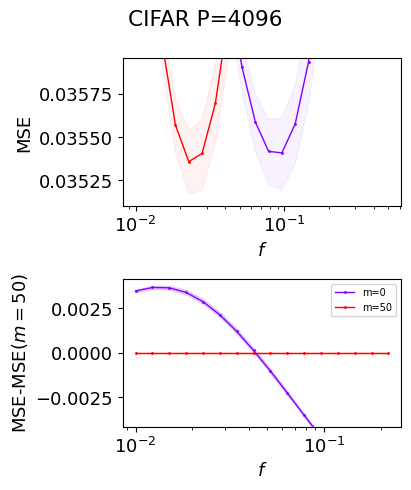

In [32]:
# Rebuttal


#dataNames=['MNIST','Fashion','CIFAR']
dataNames=['CIFAR']


Ps=np.ceil(np.power(2,np.linspace(7,12,3))).astype(int)
Ns=2*Ps

numtrials=4


for i,P in enumerate(Ps):
    for dataName in dataNames:#dataNames:
        errAfs=[]
        if dataName=='CIFARG':
            continue
        for j in range(numtrials):
            filename='rebut2_all_exp_'+dataName+'_P{}_N{}_L5_s00_seed{}.npz'.format(P,P*2,j)
            #filename_larger='larger_m_'+filename
            
            st=np.load('./sweep_data/'+filename)
            #stl=np.load('./sweep_data/'+filename_larger)

            errAf=st['errAf']
            #errAfl=stl['errAf']
            #errAf=np.block([errAf,errAfl])

            mws=st['mws']
            pas=st['pas']
            #mwsl=stl['mws']
            #mws=np.concatenate([mws,mwsl])
            errAfs.append(errAf)
            
        color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

        errAfs=np.array(errAfs)
        meanE=np.nanmean(errAfs,axis=0)
        stdE=np.nanstd(errAfs,axis=0)
        meanE=np.where(np.isnan(meanE),np.inf,meanE)
        
        
        q25e = np.quantile(errAfs, 0.25,axis=0)
        q50e = np.quantile(errAfs, 0.50,axis=0)
        #q50e = np.nanmean(errAfs, axis=0)
        q75e = np.quantile(errAfs, 0.75,axis=0)


        glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        print('f={:.4f}'.format(pas[glomin[0]]))
        print('m={:.4f}'.format(mws[glomin[1]]))
        ymin=meanE[glomin]-stdE[glomin]*1.2
        ymax=meanE[glomin]+stdE[glomin]*3
        
        errM=errAfs[:,:,-1]
        subM=errAfs-errM[:,:,None]
        #subM=(errAfs-errM[:,:,None])/(errM[:,:,None])

        #fig,ax=plt.subplots(1,2,figsize=(6.5,2.7))
        fig,ax=plt.subplots(2,1,figsize=(4.3,5))
        #print(mws)
        for i,mw in enumerate(mws):
            mu=q50e[:,i]
            li=q25e[:,i]
            ui=q75e[:,i]
            #ax[0].plot(pas,mu,'o-',label=r'$z_w=${}'.format(mw+1),ms='3',c=color[i])
            #ax[0].fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.05,color=color[i])
            ax[0].plot(pas,mu,'o-',label=r'$m=${}'.format(mw),ms=1,c=color[i],lw=1)
            ax[0].fill_between(st['pas'], li, ui, alpha=.05,color=color[i])
        fig.suptitle(dataName+' P={}'.format(P))
        
            #fig,ax=plt.subplots(1,1,figsize=(5,3))
            #ax.plot(pas,errAf,'-o',ms=2)
        ax[0].set_xscale('log')
        ax[0].set_ylim([ymin,ymax])
            
        q25u = np.quantile(subM, 0.25,axis=0)
        q50u = np.quantile(subM, 0.50,axis=0)
        #q50u = np.nanmean(subM, axis=0)
        q75u = np.quantile(subM, 0.75,axis=0)
        
        
        
        for i,mw in enumerate(mws):
            mu=q50u[:,i]
            li=q25u[:,i]
            ui=q75u[:,i]
            ax[1].plot(pas,(mu),'o-',c=color[i],lw=1,ms=1,label='m={}'.format(mw))
            ax[1].fill_between(st['pas'], (li), (ui), alpha=.15,color=color[i])
        
        ax[1].set_xscale('log')
        #ax[1].set_yscale('symlog')
        ax[1].set_ylim([-np.nanmax(q75u)*1.1,np.nanmax(q75u)*1.1])
        #ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
        #ax[1].ticklabel_format(axis='x',style='sci')
        
        ax[0].set_xlabel(r'$f$')
        ax[0].set_ylabel('MSE')
        ax[1].set_xlabel(r'$f$')
        ax[1].set_ylabel(r'MSE-MSE($m=${})'.format(mws[-1],mws[-1]))
        #ax[1].set_ylabel(r'norm(MSE-MSE($m=${}))'.format(mws[-1],mws[-1]))
        
        #glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        #print('f={:.4f}'.format(pas[glomin[0]]))
        #print('m={:.4f}'.format(mws[glomin[1]]))
        
        ax[1].legend(bbox_to_anchor=(1, 1),fontsize=7)
        plt.tight_layout()
            
        plt.savefig('reb_plot_exp_'+dataName+'_P{}'.format(P)+'.pdf', format="pdf")


f=0.0506
m=20.0000


IndexError: index 2 is out of bounds for axis 0 with size 2

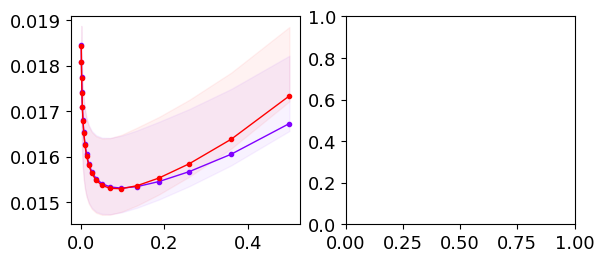

In [30]:
## Dense in the last layer

Ps=np.ceil(np.power(2,np.linspace(7,12,6))).astype(int)


dataNames=['MNIST','Fashion','CIFAR','CIFARG']

Ps=np.ceil(np.power(2,np.linspace(7,12,6))).astype(int)
Ns=2*Ps

numtrials=5


color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

for i,P in enumerate([Ps[1]]):
    for dataName in dataNames:#dataNames:
        errAfs=[]
        for j in range(numtrials):
            filename='all_last_dense_exp_'+dataName+'_P{}_N{}_L3_s00_seed{}.npz'.format(P,P*2,j)
            
            st=np.load('./sweep_data/'+filename)

            errAf=st['errAf']

            mws=st['mws']
            pas=st['pas']
            errAfs.append(errAf)
        errAfs=np.array(errAfs)
        meanE=np.nanmean(errAfs,axis=0)
        stdE=np.nanstd(errAfs,axis=0)
        meanE=np.where(np.isnan(meanE),np.inf,meanE)
        
        
        q25e = np.quantile(errAfs, 0.25,axis=0)
        q50e = np.quantile(errAfs, 0.50,axis=0)
        q75e = np.quantile(errAfs, 0.75,axis=0)


        glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        print('f={:.4f}'.format(pas[glomin[0]]))
        print('m={:.4f}'.format(mws[glomin[1]]))
        ymin=meanE[glomin]-stdE[glomin]*1.2
        ymax=meanE[glomin]+stdE[glomin]*3
        
        errM=errAfs[:,:,-1]
        subM=errAfs-errM[:,:,None]

        fig,ax=plt.subplots(1,2,figsize=(6.5,2.7))
        for i,mw in enumerate(mws):
            mu=q50e[:,i]
            li=q25e[:,i]
            ui=q75e[:,i]
            #ax[0].plot(pas,mu,'o-',label=r'$z_w=${}'.format(mw+1),ms='3',c=color[i])
            #ax[0].fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.05,color=color[i])
            ax[0].plot(pas,mu,'o-',label=r'$m=${}'.format(mw),ms='3',c=color[i],lw=1)
            ax[0].fill_between(st['pas'], li, ui, alpha=.05,color=color[i])
        fig.suptitle(dataName+' P={}'.format(P))
        ax[0].legend()
            #fig,ax=plt.subplots(1,1,figsize=(5,3))
            #ax.plot(pas,errAf,'-o',ms=2)
        ax[0].set_xscale('log')
        ax[0].set_ylim([ymin,ymax])
            
        q25u = np.quantile(subM, 0.25,axis=0)
        q50u = np.quantile(subM, 0.50,axis=0)
        q75u = np.quantile(subM, 0.75,axis=0)

        for i,mw in enumerate(mws):
            mu=q50u[:,i]
            li=q25u[:,i]
            ui=q75u[:,i]
            ax[1].plot(pas,np.abs(mu),'-',c=color[i],lw=1)
            ax[1].plot(pas,np.where(mu>0,mu,np.nan),'o',label='m={}'.format(mw),c=color[i],ms=4,lw=1)
            ax[1].plot(pas,np.where(mu<0,-mu,np.nan),'d',c=color[i],ms=4,lw=1)
            ax[1].fill_between(st['pas'], (li), (ui), alpha=.15,color=color[i])
            ax[1].fill_between(st['pas'], -(ui), -(li), alpha=.15,color=color[i])
        #ax[1].set_title(dataName+' P={}'.format(P))
        
        ax[1].set_xscale('log')
        ax[1].set_yscale('log')
        
        ax[0].set_xlabel(r'$f$')
        ax[0].set_ylabel('MSE')
        ax[1].set_xlabel(r'$f$')
        ax[1].set_ylabel(r'|MSE-MSE($m=${})|'.format(mws[-1]))
        
        #glomin=np.unravel_index(meanE.argmin(), meanE.shape)
        #print('f={:.4f}'.format(pas[glomin[0]]))
        #print('m={:.4f}'.format(mws[glomin[1]]))
        plt.tight_layout()

            

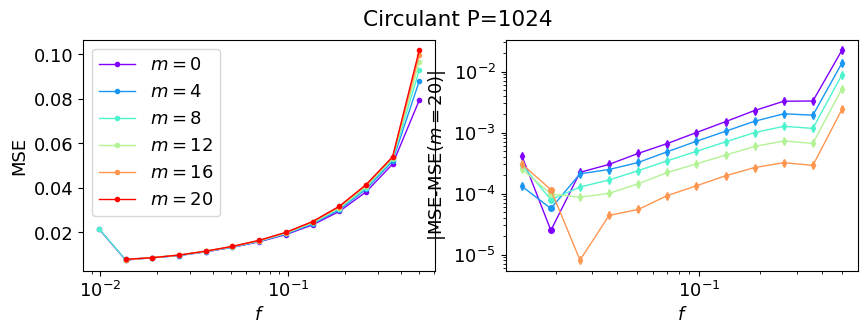

In [7]:
# Circulant data
dataNames=['Circulant']


P=2**10
N=2*P


for dataName in dataNames:#dataNames:
    errAfs=[]
    filename='all_exp_theory_'+dataName+'_P{}_N{}_L3_s01.1_seed{}.npz'.format(P,P*2,0)

    st=np.load('./sweep_data/'+filename)

    errAf=st['errAf']
    errTf=st['errTf']

    mws=st['mws']
    pas=st['pas']
    
    color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

    glomin=np.unravel_index(errAf.argmin(), meanE.shape)
    #print('f={:.4f}'.format(pas[glomin[0]]))
    #print('m={:.4f}'.format(mws[glomin[1]]))
    ymin=meanE[glomin]-stdE[glomin]*1.2
    ymax=meanE[glomin]+stdE[glomin]*6

    errM=errAf[:,-1]
    subM=errAf-errM[:,None]

    fig,ax=plt.subplots(1,2,figsize=(10,3))
    for i,mw in enumerate(mws):
        mu=errAf[:,i]
        ax[0].plot(pas,mu,'o-',label=r'$m=${}'.format(mw),ms='3',c=color[i],lw=1)
    fig.suptitle(dataName+' P={}'.format(P))
    ax[0].legend()
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        #ax.plot(pas,errAf,'-o',ms=2)
    ax[0].set_xscale('log')
    #ax[0].set_ylim([ymin,ymax])

    for i,mw in enumerate(mws):
        mu=subM[:,i]
        ax[1].plot(pas,np.abs(mu),'-',c=color[i],lw=1)
        ax[1].plot(pas,np.where(mu>0,mu,np.nan),'o',label='m={}'.format(mw),c=color[i],ms=4,lw=1)
        ax[1].plot(pas,np.where(mu<0,-mu,np.nan),'d',c=color[i],ms=4,lw=1)
    #ax[1].set_title(dataName+' P={}'.format(P))

    ax[1].set_xscale('log')
    ax[1].set_yscale('log')

    ax[0].set_xlabel(r'$f$')
    ax[0].set_ylabel('MSE')
    ax[1].set_xlabel(r'$f$')
    ax[1].set_ylabel(r'|MSE-MSE($m=${})|'.format(mws[-1]))

    #glomin=np.unravel_index(meanE.argmin(), meanE.shape)
    #print('f={:.4f}'.format(pas[glomin[0]]))
    #print('m={:.4f}'.format(mws[glomin[1]]))



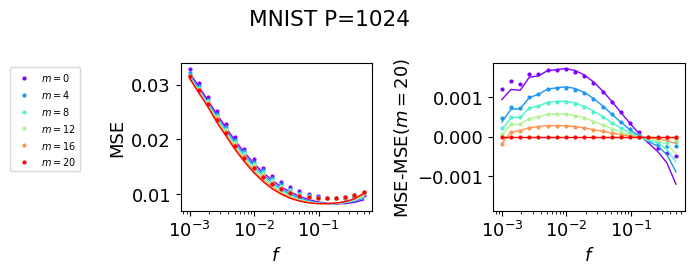

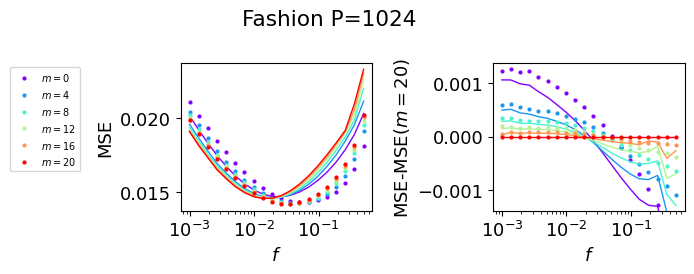

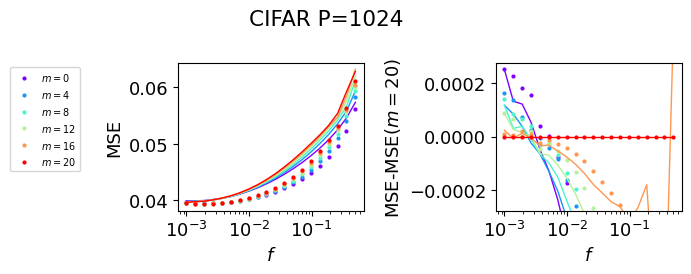

In [72]:
dataNames=['MNIST','Fashion','CIFAR','CIFARG']



P=2**10
N=2*P


for dataName in dataNames:#dataNames:
    if dataName=='CIFARG':
        continue
    errAfs=[]
    filename='all_exp_theory_'+dataName+'_P{}_N{}_L3_s00_seed{}.npz'.format(P,P*2,0)

    st=np.load('./sweep_data/'+filename)

    errAf=st['errAf']
    errTf=st['errTf']

    mws=st['mws']
    pas=st['pas']
    
    color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

    glomin=np.unravel_index(errAf.argmin(), meanE.shape)
    #print('f={:.4f}'.format(pas[glomin[0]]))
    #print('m={:.4f}'.format(mws[glomin[1]]))
    ymin=meanE[glomin]-stdE[glomin]*1.2
    ymax=meanE[glomin]+stdE[glomin]*6

    errM=errAf[:,-1]
    subM=errAf-errM[:,None]
    
    errMT=errTf[:,-1]
    subMT=errTf-errMT[:,None]

    fig,ax=plt.subplots(1,2,figsize=(7.5,2.8))
    for i,mw in enumerate(mws):
        mu=errAf[:,i]
        ax[0].plot(pas,mu,'o',label=r'$m=${}'.format(mw),ms=2,c=color[i],lw=1)
        mu=errTf[:,i]
        ax[0].plot(pas,mu,'-',ms=2,c=color[i],lw=1)
        
    fig.suptitle(dataName+' P={}'.format(P))
    #ax[0].legend()
        #fig,ax=plt.subplots(1,1,figsize=(5,3))
        #ax.plot(pas,errAf,'-o',ms=2)
    ax[0].set_xscale('log')
    #ax[2].legend()

    #ax[0].set_ylim([ymin,ymax])

    for i,mw in enumerate(mws):
        mu=subM[:,i]
        ax[1].plot(pas,mu,'o',c=color[i],lw=1,ms=2)
        #ax[1].plot(pas,np.where(mu>0,mu,np.nan),'o',label='m={}'.format(mw),c=color[i],ms=4,lw=1)
        #ax[1].plot(pas,np.where(mu<0,-mu,np.nan),'d',c=color[i],ms=4,lw=1)
        
        
        mu=subMT[:,i]
        ax[1].plot(pas,mu,'-',c=color[i],lw=1,ms=2)
        #ax[3].plot(pas,np.mu,'o',label='m={}'.format(mw),c=color[i],zorder=10,ms=4,lw=1)
        #ax[3].plot(pas,np.where(mu<0,-mu,np.nan),'d',c=color[i],zorder=10,ms=4,lw=1)
        
    #ax[1].set_title(dataName+' P={}'.format(P))

    ax[1].set_xscale('log')
    #ax[1].set_yscale('log')
    #ax[3].set_yscale('log')
    ax[1].set_ylim([-np.max(subM)*1.1,np.max(subM)*1.1])

    ax[0].set_xlabel(r'$f$')
    ax[0].set_ylabel('MSE')
    ax[1].set_xlabel(r'$f$')
    ax[1].set_ylabel(r'MSE-MSE($m=${})'.format(mws[-1]))
    
    #ax[0].set_title('Experiment')
    #ax[2].set_title('Generalization Theory')

    #glomin=np.unravel_index(meanE.argmin(), meanE.shape)
    #print('f={:.4f}'.format(pas[glomin[0]]))
    #print('m={:.4f}'.format(mws[glomin[1]]))
    ax[0].legend(bbox_to_anchor=(-0.5, 1),fontsize=7)
    plt.tight_layout()
                
        
    plt.savefig('plot_exp_and_theory_'+dataName+'_P{}'.format(P)+'.pdf', format="pdf")



f=0.1874
m=20.0000
MNIST P=1024, min f=0.1874


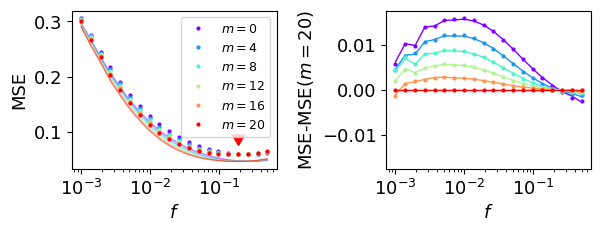

In [75]:
dataNames=['MNIST','Fashion','CIFAR','CIFARG']
dataName=dataNames[0]



P=2**10
N=2*P

#two_classes_exp_theory_MNIST_P1024_N2048_L3_s00_seed0.npz
errAfs=[]
filename='two_classes_exp_theory_'+dataName+'_P{}_N{}_L3_s00_seed{}.npz'.format(P,P*2,0)

st=np.load('./sweep_data/'+filename)

errAf=st['errAf']
errTf=st['errTf']

mws=st['mws']
pas=st['pas']

color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))

glomin=np.unravel_index(errAf.argmin(), errAf.shape)

errM=errAf[:,-1]
subM=errAf-errM[:,None]

errMT=errTf[:,-1]
subMT=errTf-errMT[:,None]

glomin=np.unravel_index(errAf.argmin(), errAf.shape)
print('f={:.4f}'.format(pas[glomin[0]]))
print('m={:.4f}'.format(mws[glomin[1]]))

fig,ax=plt.subplots(1,2,figsize=(6.2,2.5))
for i,mw in enumerate(mws):
    mu=errAf[:,i]
    ax[0].plot(pas,mu,'o',label=r'$m=${}'.format(mw),ms='2',c=color[i])
    mu=errTf[:,i]
    ax[0].plot(pas,mu,'-',ms='2',c=color[i],alpha=0.5,lw=1)
    
ax[0].plot(pas[glomin[0]],np.min(errAf)+0.03,marker=(3, 0, 90*2),ms=10,c=color[glomin[1]])

#fig.suptitle(dataName+' P={}, min f={:.4f}'.format(P,pas[glomin[0]]))
ax[0].legend()
    #fig,ax=plt.subplots(1,1,figsize=(5,3))
    #ax.plot(pas,errAf,'-o',ms=2)
ax[0].set_xscale('log')
#ax[0].set_ylim([0.04,0.2])

for i,mw in enumerate(mws):
    mu=subM[:,i]
    ax[1].plot(pas,mu,'o',c=color[i],lw=1,ms=2)

    mu=subMT[:,i]
    ax[1].plot(pas,mu,'-',c=color[i],lw=1,ms=2)

#ax[1].set_title(dataName+' P={}'.format(P))

ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_ylim([-np.max(subM)*1.1,np.max(subM)*1.1])

ax[0].set_xlabel(r'$f$')
ax[0].set_ylabel('MSE')
ax[1].set_xlabel(r'$f$')
ax[1].set_ylabel(r'MSE-MSE($m=${})'.format(mws[-1]))

#ax[0].legend(bbox_to_anchor=(-0.3, 1),fontsize=8)
ax[0].legend(fontsize=9)
plt.tight_layout()

plt.savefig('plot_MNIST_two_class_theory.svg', format="svg")

print(dataName+' P={}, min f={:.4f}'.format(P,pas[glomin[0]]))


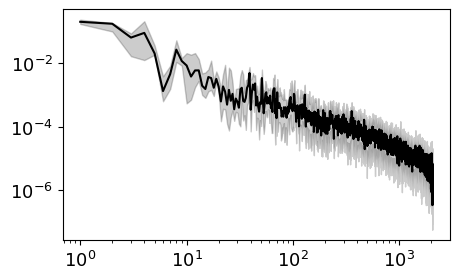

In [10]:
#etas[j,g,:]=np.copy(eta)
#errTf[j,g]=np.mean(Eg)
#VT[j,g,:,:]=vteach
#ERO[j,g,:]=Erhos
#Kaps[j,g]=ka
#Gams[j,g]=gam

VT=np.squeeze(st['VT'])
VT[:,:,0]=np.nan


VTflat=(np.reshape(VT,(-1,np.shape(VT)[-1])))
#VTflat=VTflat/(VTflat[:,1][:,None])
VT2flat=np.square(VTflat)
#meanV=np.mean(VT2flat,axis=0)
#stdV=np.std(VT2flat,axis=0)

q25 = np.quantile(VT2flat, 0.25,axis=0)
q50 = np.quantile(VT2flat, 0.50,axis=0)
q75 = np.quantile(VT2flat, 0.75,axis=0)


xv=np.arange(np.shape(VT2flat)[1])

fig,ax=plt.subplots(1,1,figsize=(5,3))
#ax.plot(xv,VT2flat.T)
ax.plot(xv,q50,c='k')
ax.fill_between(xv, (q25), (q75), alpha=0.2,color='k')
            #ax[0].plot(pas,mu,'o-',label=r'$z_w=${}'.format(mw+1),ms='3',c=color[i])
            #ax[0].fill_between(st['pas'], (mu-ci), (mu+ci), alpha=.05,color=color[i])
        
ax.set_yscale('log')
ax.set_xscale('log')



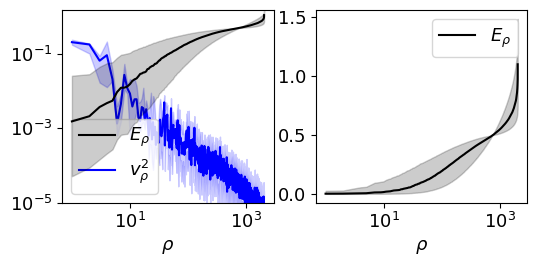

In [11]:
ERO=np.squeeze(st['ERO'])

ERO[:,:,0]=np.nan

EROflat=(np.reshape(ERO,(-1,np.shape(ERO)[-1])))
#meanV=np.mean(VT2flat,axis=0)
#stdV=np.std(VT2flat,axis=0)

q25e = np.quantile(EROflat, 0.25,axis=0)
q50e = np.quantile(EROflat, 0.50,axis=0)
q75e = np.quantile(EROflat, 0.75,axis=0)


xv=np.arange(np.shape(EROflat)[1])

fig,ax=plt.subplots(1,2,figsize=(6,2.5))
ax[0].plot(xv,q50e,c='k',zorder=10,label=r'$E_\rho$')
ax[0].fill_between(xv, (q25e), (q75e), alpha=0.2,color='k',zorder=10)
ax[0].plot(xv,q50,c='b',zorder=-10,label=r'$v^2_\rho$')
ax[0].fill_between(xv, (q25), (q75), alpha=0.2,color='b',zorder=-10)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
#ax.set_xlim([0,500])
ax[0].set_ylim([1e-5,1.5])

ax[1].plot(xv,q50e,c='k',label=r'$E_\rho$')
ax[1].fill_between(xv, (q25e), (q75e), alpha=0.2,color='k')
ax[1].set_xscale('log')
#ax[1].plot(xv,q50,c='b',zorder=-10)
#ax[1].fill_between(xv, (q25), (q75), alpha=0.2,color='b',zorder=-10)

#ax[1].plot(xv,EROflat.T,c='k',alpha=0.1);

#ax[1].set_yscale('log')
#ax.set_xlim([0,500])
#ax[1].set_ylim([2e-2,2])
ax[0].set_xlabel(r'$\rho$')
ax[1].set_xlabel(r'$\rho$')
ax[0].legend()
ax[1].legend()

plt.savefig('plot_MNIST_two_class_theory_rhos.svg', format="svg")



f0=0.0365
m0=0.0000
f1=0.0365
m1=20.0000


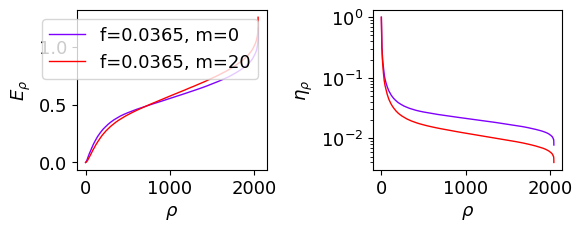

In [12]:
fi=8
fi0=fi
mi0=0

fi1=fi
mi1=-1

print('f0={:.4f}'.format(pas[fi0]))
print('m0={:.4f}'.format(mws[mi0]))
print('f1={:.4f}'.format(pas[fi1]))
print('m1={:.4f}'.format(mws[mi1]))


eta=st['etas']
eta[:,:,0]=np.nan
eta=eta/eta[:,:,1][:,:,None]

fig,ax=plt.subplots(1,2,figsize=(6,2.5))

ERO=np.squeeze(st['ERO'])
#fig,ax=plt.subplots(1,1,figsize=(5,3))
ax[0].plot(xv+1,ERO[fi0,mi0],c=color[mi0],label='f={:.4f}, m={}'.format(pas[fi0],mws[mi0]),lw=1);
ax[0].plot(xv+1,ERO[fi1,mi1],c=color[mi1],label='f={:.4f}, m={}'.format(pas[fi1],mws[mi1]),lw=1);
ax[0].set_ylabel(r'$E_\rho$')
ax[0].set_xlabel(r'$\rho$')
#ax[1].plot(xv,q50e,c='k')
#ax[1].fill_between(xv, (q25e), (q75e), alpha=0.2,color='k')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax[0].legend()

ax[1].plot(xv+1,eta[fi0,mi0],c=color[mi0],label='f={:.4f}, m={}'.format(pas[fi0],mws[mi0]),lw=1);
ax[1].plot(xv+1,eta[fi1,mi1],c=color[mi1],label='f={:.4f}, m={}'.format(pas[fi1],mws[mi1]),lw=1);
#ax.set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$\eta_\rho$')
ax[1].set_xlabel(r'$\rho$')

#ax[1].legend()
plt.tight_layout()

plt.savefig('plot_MNIST_two_class_theory_rhos_examples.svg', format="svg")



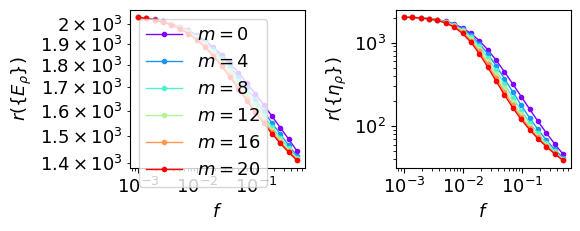

In [14]:
fig,ax=plt.subplots(1,2,figsize=(6,2.5))

ERO=np.squeeze(st['ERO'])
ED=np.square(np.nansum(ERO,axis=-1))/np.nansum(np.square(ERO),axis=-1)

for i,mw in enumerate(mws):
    mu=ED[:,i]
    ax[0].plot(pas,mu,'-o',label=r'$m=${}'.format(mw),ms='3',c=color[i],lw=1)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$r(\{E_\rho\})$')
ax[0].set_xlabel(r'$f$')
ax[0].legend()

eta=st['etas']
eta[:,:,0]=np.nan
ED=np.square(np.nansum(eta,axis=-1))/np.nansum(np.square(eta),axis=-1)

for i,mw in enumerate(mws):
    mu=ED[:,i]
    ax[1].plot(pas,mu,'-o',label=r'$m=${}'.format(mw),ms='3',c=color[i],lw=1)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$r(\{\eta_\rho\})$')
ax[1].set_xlabel(r'$f$')

plt.tight_layout()

#ax[1].legend()
#ax.set_ylim([1e-5,1])
#ax.set_ylim([1e-5,1])

plt.savefig('plot_MNIST_two_class_theory_rhos_ED.svg', format="svg")



(1e-05, 1.0)

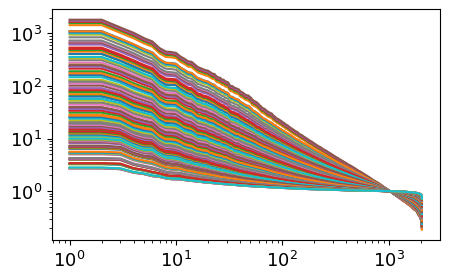

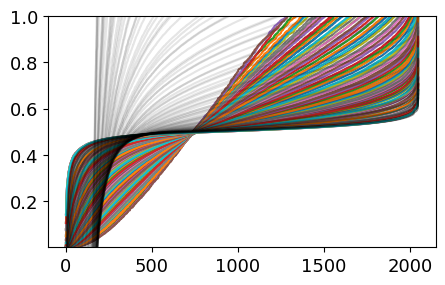

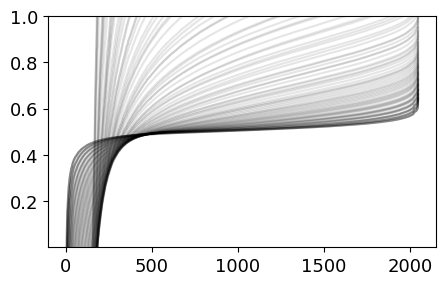

In [15]:
alpha=P/N
eta=st['etas']
#eta[:,:,0]=np.nan
eta[:,:,0]=eta[:,:,1]
#eta=eta/np.nanmean(eta,axis=-1)[:,:,None]
#eta=eta/eta[:,:,1][:,:,None]
eta = eta/(np.quantile(eta, 0.50,axis=-1)[:,:,None])

etaflat=(np.reshape(eta,(-1,np.shape(eta)[-1])))

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(xv+1,etaflat.T);
ax.set_xscale('log')
ax.set_yscale('log')

#eta=eta/(eta[:,:,2][:,:,None])
#Erhots=(1-alpha)*( 1-2*( (eta-1) - np.mean(eta-1,axis=-1)[:,:,None]  )*alpha )
deta=eta-1
Erhots=1/2-2*alpha*(1-alpha)*( (deta) - np.nanmean(deta,axis=-1)[:,:,None]  )


#ERO=np.squeeze(st['ERO'])

#EROflat=(np.reshape(ERO,(-1,np.shape(ERO)[-1])))
Erhotsflat=(np.reshape(Erhots,(-1,np.shape(Erhots)[-1])))


xv=np.arange(np.shape(EROflat)[1])

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(xv,EROflat.T);
ax.plot(xv,Erhotsflat.T,c='k',alpha=0.1);
ax.set_ylim([1e-5,1])

fig,ax=plt.subplots(1,1,figsize=(5,3))
ax.plot(xv,Erhotsflat.T,c='k',alpha=0.1);
ax.set_ylim([1e-5,1])



In [16]:
import numpy as jnp
import scipy as jsc

def A2(thetar,taur,n=100):
    theta=thetar[None,:,None]
    xi=(jnp.pi-thetar)/2.0
    tau=taur[:,None,None]
    phi=jnp.linspace(0,xi,n).T[None,:,:]
    
    #L_term1=2*jnp.cos(phi+theta)*(jnp.sin(phi))*jnp.exp(-0.5*jnp.square(tau/jnp.sin(phi)))
    #L_term2=tau* (jnp.cos(phi+theta)) *jnp.sqrt(jnp.pi/2)*jsc.special.erf(jnp.sqrt(0.5)*tau/jnp.sin(phi))
    L_term1=-2*jnp.cos(phi+theta)*(jnp.sin(phi)/jnp.sin(theta))*jnp.exp(-0.5*jnp.square(tau/jnp.sin(phi)))
    L_term2=-tau* (jnp.cos(phi+theta)/jnp.sin(theta)) *jnp.sqrt(jnp.pi/2)*jsc.special.erf(jnp.sqrt(0.5)*tau/jnp.sin(phi))
    
    inte=jnp.trapz((L_term1+L_term2),x=phi,axis=-1)
    return jnp.squeeze(inte)

def getB(thetar,taur):
    theta=thetar[None,:]
    tau=taur[:,None]
    phi=(jnp.pi-theta)/2
    L_term1=2*jnp.sin(phi+theta)*jnp.sin(phi)*jnp.exp(-0.5*jnp.square(tau/jnp.sin(phi)))
    L_term2=tau*(jnp.sin(phi+theta)+jnp.sin(phi))*jnp.sqrt(jnp.pi/2)*jsc.special.erf(jnp.sqrt(0.5)*tau/jnp.sin(phi))
    #B = -0.5*(L_term1+L_term2)
    B = 1/(2*jnp.sin(theta)) * (L_term1+L_term2)
    return jnp.squeeze(B)

def getOptM(taus):
    I_0=jnp.squeeze(gp.I2(jnp.array([0]),taus,n=10000))
    I_pih=jnp.squeeze(gp.I2(jnp.array([jnp.pi/2]),taus,n=10000))
    A=A2(jnp.array([np.arccos(0.99999)]),taus,n=1000)
    B=getB(jnp.array([np.arccos(0.99999)]),taus)
    dIdc=A+B

    ms=(2*dIdc+taus*jnp.sqrt(2*jnp.pi)-2*I_0)/(2*I_pih-taus*jnp.sqrt(2*jnp.pi))
    return ms

#print(getOptM(np.array([gp.getTau(0.1)])))

pas_c=jnp.linspace(0.4999,1e-2,200)
taus_c=gp.getTau(jnp.array(pas_c))
#tau=jnp.array([1e-4,0.3,0.5,0.7,0.9,1.1])
mstar_c=getOptM(taus_c)



FileNotFoundError: [Errno 2] No such file or directory: './sweep_data/deep_all_exp_CIFARG_P1024_N2048_L8_s00_seed0.npz'

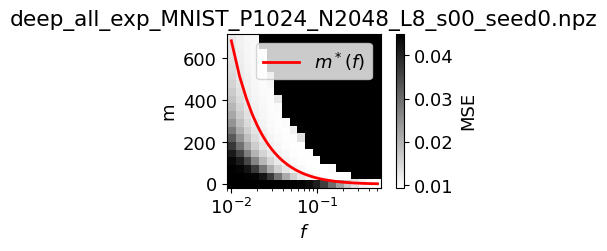

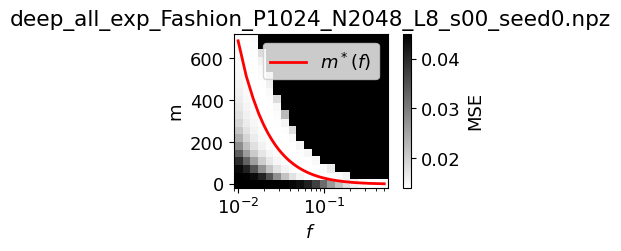

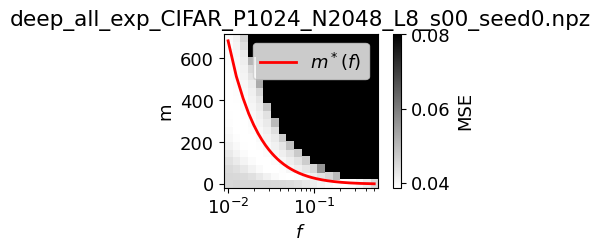

In [67]:
#filename='deep_all_exp_MNIST_P1024_N2048_L13_s00_seed0.npz'
#filename='deep_all_exp_Fashion_P1024_N2048_L13_s00_seed0.npz'
#filename='deep_all_exp_CIFAR_P1024_N2048_L13_s00_seed0.npz'
#filename='deep_all_exp_CIFARG_P1024_N2048_L13_s00_seed0.npz'

#filename='deep_all_exp_Fashion_P1024_N2048_L18_s00_seed0.npz'
#filename='deep_all_exp_CIFAR_P1024_N2048_L18_s00_seed0.npz'
#filename='deep_all_exp_CIFARG_P1024_N2048_L18_s00_seed0.npz'

L=8
for dataName in dataNames:
    #filename='deep_all_exp_'+dataName+'_P1024_N2048_L18_s00_seed0.npz'
    filename='deep_all_exp_'+dataName+'_P1024_N2048_L{}_s00_seed0.npz'.format(L)

    st=np.load('./sweep_data/'+filename)

    errAf=st['errAf']

    mws=st['mws']
    pas=st['pas']

    color = cm.rainbow(np.linspace(0, 1, np.shape(mws)[0]))


    qLv = np.nanquantile(errAf, 0.02)
    qMv = np.nanquantile(errAf, 0.50)
    qUv = np.nanquantile(errAf, 0.98)


    errM=errAf[:,-1]
    subM=errAf-errM[:,None]

    fig,ax=plt.subplots(1,1,figsize=(4,2))
    im=ax.pcolor(pas,mws,errAf.T,cmap='binary',vmin=qLv,vmax=qUv)
    ax.plot(pas_c,mstar_c,c='r',lw=2,label=r'$m^*(f)$')
    ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_facecolor('k')
    ax.set_box_aspect(1)
    cb=fig.colorbar(im, ax=ax)
    cb.set_label('MSE')
    ax.set_title(filename)
    #fig.tight_layout()
    ax.set_xlabel(r'$f$')
    ax.set_ylabel('m')
    ax.legend()

    plt.savefig('plot_'+dataName+'_L{}_optimal_z.svg'.format(L), format="svg")




/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == "":
/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


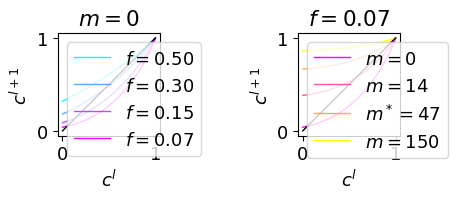

In [18]:
import matplotlib as mpl

def getCnext(cs,tau,m):
    I_0=gp.I2(jnp.array([0]),jnp.array([tau]),n=10000)
    I_pih=gp.I2(jnp.array([jnp.pi/2]),jnp.array([tau]),n=10000)

    sigop=jnp.sqrt( (2.0*jnp.pi) /( 2*I_0-2*tau*jnp.sqrt(2*jnp.pi) + m*(2*I_pih-tau*jnp.sqrt(2*jnp.pi)) ))
    sigop=sigop[0]

    I_c=gp.I2(jnp.arccos(cs),jnp.array([tau]),n=10000)

    cnext=jnp.squeeze(jnp.square(sigop)/(2*jnp.pi) * ( 2*I_c-tau*jnp.sqrt(2*jnp.pi)*(1+cs) + m*(2*I_pih-tau*jnp.sqrt(2*jnp.pi)) ))
    return cnext

pasm=jnp.array([0.49999, 0.3, 0.15, 7e-2])
tausm=gp.getTau(pasm)

color_list = cm.cool(np.linspace(0, 1, np.shape(pasm)[0]))

cs=jnp.linspace(0,1,1000)

fig,ax=plt.subplots(1,2,figsize=(5,2.2))
m=0
for i,tau in enumerate(tausm):
    cnext=getCnext(cs,tau,m)
    ax[0].plot(cs,cnext,label=r'$f=${:.2f}'.format(pasm[i]),lw=1,c=color_list[i])
    
ax[0].plot([0,1],[0,1],c='k',lw=1)
ax[0].legend()#bbox_to_anchor=(1.05, 1.0), loc='upper left')
#ax.legend()
ax[0].set_xlabel(r'$c^{l}$')
ax[0].set_ylabel(r'$c^{l+1}$')
ax[0].set_title(r'$m=${}'.format(m))
ax[0].set_aspect('equal')
ax[0].set_box_aspect(1)


pa=0.07
tau=gp.getTau(pa)
zsv=np.array([1,15,151])
zstar=np.squeeze(getOptM(np.array([tau])))+1
zsv=np.append(zsv,zstar)
flag=(np.ones(np.shape(zsv)[0])==0)
flag[-1]=True

sortI=np.argsort(zsv)
zsv=zsv[sortI]
flag=flag[sortI]


msv=zsv-1

color_list = cm.spring(np.linspace(0, 1, np.shape(msv)[0]))

for i,m in enumerate(msv):
    cnext=getCnext(cs,tau,m)
    if flag[i]:
        label=r'$m^*=${:.0f}'.format(msv[i])
    else:
        label=r'$m=${:.0f}'.format(msv[i])
    ax[1].plot(cs,cnext,label=label,lw=1,c=color_list[i])

ax[1].plot([0,1],[0,1],c='k',lw=1)
ax[1].legend()#bbox_to_anchor=(1.05, 1.0), loc='upper left')
#ax.legend()
ax[1].set_xlabel(r'$c^{l}$')
ax[1].set_ylabel(r'$c^{l+1}$')
ax[1].set_title(r'$f=${}'.format(pa))
ax[1].set_aspect('equal')
ax[1].set_box_aspect(1)
plt.tight_layout()

plt.savefig('plot_dynamics.svg', format="svg")




In [19]:
import jax.numpy as jnp

#mws=[0,4,8,12,16,20]#0,2,4,6]
mws=[0,4,8,12,16,20]#0,2,4,6]
powermin=-3
powermax=np.log(0.4999)/np.log(10)
pas=jnp.power(10,jnp.linspace(powermin,powermax,20))[::-1]

print(pas)


[0.4999     0.36044315 0.25989035 0.18738882 0.13511306 0.09742057
 0.07024321 0.05064746 0.03651837 0.02633085 0.01898534 0.013689
 0.00987019 0.0071167  0.00513136 0.00369986 0.00266772 0.0019235
 0.0013869  0.001     ]


0.07024321


(-0.1, 1.1)

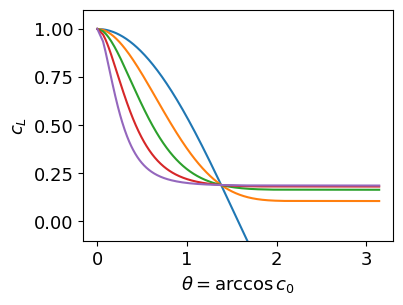

In [20]:
pa=pas[6]
print(pa)
tau=gp.getTau(pa)
m=3
#m=np.squeeze(getOptM(np.array([tau])))


cs_init=jnp.linspace(-1,1,1000)
cs_temp=np.copy(cs_init)

Ls=10
hiddenLs=5
css=[]
css.append(cs_temp)
ess=[]
for i in range(hiddenLs-1):
    #I_val=gp.I2(np.arccos(cs_temp),np.array([tau]),n=10000)
    #Esim=1/(2.0*np.pi) *( 2*I_val-2*tau*np.sqrt(2*np.pi)*(1+cs_temp)  )  #  the actual post activation kernel
    #ess.append(np.squeeze(Esim))
    cnext=getCnext(cs_temp,tau,m)
    css.append(cnext)
    cs_temp=np.copy(cnext)
css=np.array(css)


fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.plot(np.arccos(cs_init),css.T);
ax.set_xlabel(r'$\theta=\arccos c_0$')
ax.set_ylabel(r'$c_L$')
ax.set_ylim([-0.1,1.1])

#fig,ax=plt.subplots(1,1,figsize=(5,3))
#ax.plot(np.arccos(cs_init),ess.T);
#ax.set_ylabel('$K_L$')
#ax.set_xlabel('input angle')


In [21]:
def getStepDataSimple(angles,thres=0):
    X=np.block([[np.cos(angles)],[np.sin(angles)]]).T
    Y=(np.sin(angles)>=thres)[:,None]*2.0 - 1
    return X,Y

np.random.seed(0)

N=50
L=6


angles=np.linspace(0,2*np.pi,N)
X,Y=getStepDataSimple(angles,thres=0)
X=X/np.sqrt(np.sum(np.square(X),axis=1))[:,None]

resolution=10000000#100000000#100000000
trapz_n=10000
chunk_size=100000



loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel saved
4th layer kernel saved
done
loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel saved
4th layer kernel saved
done
loaded from a file
0th layer kernel saved
1th layer kernel saved
2th layer kernel saved
3th layer kernel saved
4th layer kernel saved
done


/home/cc2465/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


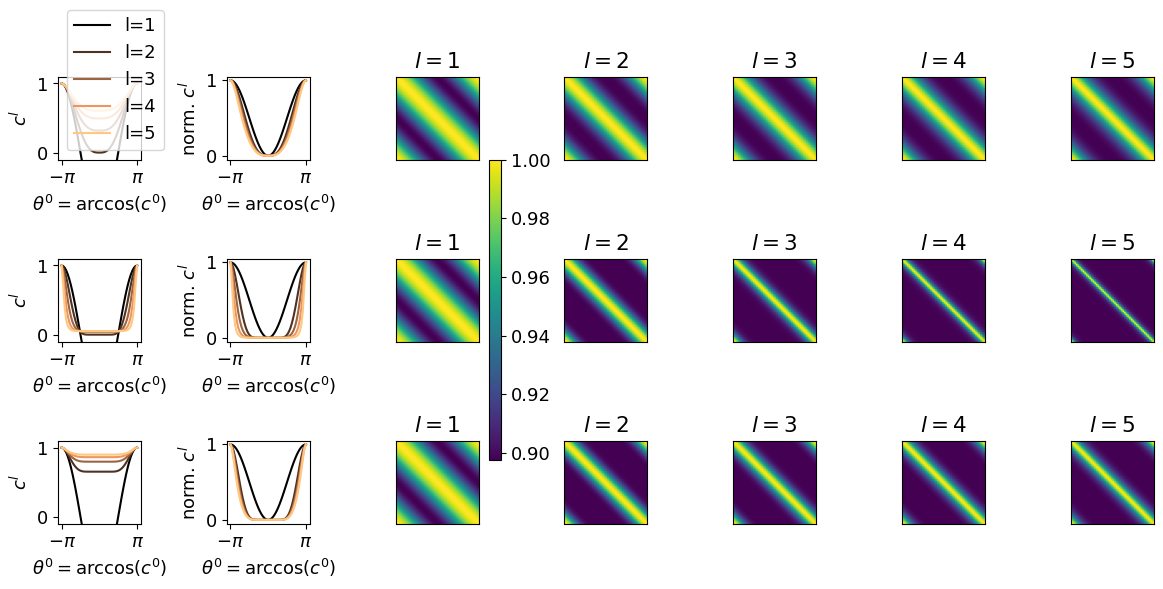

In [33]:
pa0=pas[0]
tau0=gp.getTau(pa0)
m0=0

pa1=pas[6]
tau1=gp.getTau(pa1)
m1=0

pa2=pas[6]
tau2=gp.getTau(pa2)
m2=np.squeeze(getOptM(np.array([tau2])))

pavs=[pa0,pa1,pa2]
tauvs=[tau0,tau1,tau2]
mvs=[m0,m1,m2]

color_list = cm.copper(np.linspace(0, 1, L-1))


fig,ax=plt.subplots(3,L+1,figsize=(12,6))

for j in range(3):
    pa=pavs[j]
    tau=tauvs[j]
    m=mvs[j]
    sigma=np.squeeze(gp.getosig(tau,m=m))
    converter=gp.getConverter_chunk_save_load(tau=tau,resolution=resolution,trapz_n=trapz_n,chunk_size=chunk_size,silence=False,home=home)
    load_names,load_names2=gp.getSCK_flat_fast_and_save(X,X,converter,mw=m,sigma=sigma,L=L,input_unit_ball=False,home=home,saveKh=True,label='train')

    for i in range(L-1):
        #if i==0:
        #    continue
        
        A=np.load(load_names[i])
        C=np.load(load_names2[i])
        A=A/np.max(A)
        C=C/np.max(C)
        Cn=C-np.min(C)
        Cn=Cn/np.max(Cn)
        
        ax[j][0].plot(angles,C[0,:],c=color_list[i],label='l={}'.format(i+1))
        ax[j][1].plot(angles,Cn[0,:],c=color_list[i])
        im=ax[j][i+2].imshow(C)
        ax[j][i+2].set_xticks([])
        ax[j][i+2].set_yticks([])
        ax[j][i+2].set_title(r'$l=${}'.format(i+1))
        
        #ax[j][0].set_aspect('equal')
        ax[j][0].set_box_aspect(1)
        #ax[j][1].set_aspect('equal')
        ax[j][1].set_box_aspect(1)
    
        ax[j][0].set_xticks([0,2*np.pi],['$-\pi$',r'$\pi$'])
        ax[j][1].set_xticks([0,2*np.pi],['$-\pi$',r'$\pi$'])

    #ax.plot(np.arccos(cs_init),css.T,c='g');
    ax[j][0].set_ylabel(r'$c^l$')
    ax[j][0].set_xlabel(r'$\theta^0=\arccos(c^0)$')
    ax[j][1].set_ylabel(r'norm. $c^l$')
    ax[j][1].set_xlabel(r'$\theta^0=\arccos(c^0)$')
    ax[j][0].set_ylim([-0.1,1.1])
    
#x1=1
#y1=0.25
#w1=0.01
#h1=0.5
x1=0.43
y1=0.25
w1=0.01
h1=0.5

cax = fig.add_axes([x1,y1,w1,h1])
cb=plt.colorbar(im,cax=cax,aspect=10,shrink=0.5)#,orientation='horizontal')
ax[0][0].legend()

plt.tight_layout()

plt.savefig('plot_kernels.svg', format="svg")



In [ ]:
pa0=pas[0]
tau0=gp.getTau(pa0)
m0=0

pa1=pas[7]
tau1=gp.getTau(pa1)
m1=0

pa2=pas[7]
tau2=gp.getTau(pa2)
m2=np.squeeze(getOptM(np.array([tau2])))


In [ ]:
m